                                                                CASE STUDY 04
                                                                    CNN
                                                                --------------
                                                                    
You are given a dataset containing images of 15 types of common vegetables. Your task is to 
create a binary classification model to distinguish between two selected types of vegetables. 
After extracting the data and selecting the two vegetable types, follow these steps:
• Data Preprocessing
• Model Building
• Training
• Evaluation
• Model Optimization
Extension to Multiclass Classification: Once your binary classification model is working well, 
extend it to support multi-class classification. You can progressively add more vegetable types 
to the model.
Real-Time Inference: Test the model with real-time data. Take pictures of vegetables with your 
smartphone or other devices and use the model to classify them. Assess the model's 
performance.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install pillow

In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'Vegetables/Vegetable Images/train'
test_dir = 'Vegetables/Vegetable Images/test'
validation_dir = 'Vegetables/Vegetable Images/validation'


In [3]:
# DATA PREPROCESSING
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
 )

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  
    batch_size=20,
    class_mode='binary',  # For binary classification
    classes=['Carrot', 'Cabbage'],
)

Found 2000 images belonging to 2 classes.


In [5]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='binary',
    classes=['Carrot', 'Cabbage'],
)

Found 400 images belonging to 2 classes.


In [6]:
# MODEL BUILDING

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# MODEL TRAINING

In [10]:
model.fit(
    train_generator,
    steps_per_epoch=100,  
    epochs=10,
    validation_data=validation_generator,
    validation_steps=20  
)

Epoch 1/10
100/100 [==============================] - 20s 182ms/step - loss: 0.0757 - accuracy: 0.9610 - val_loss: 2.5046e-04 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 19s 190ms/step - loss: 0.0032 - accuracy: 0.9985 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 20s 203ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 3.6487e-04 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 18s 182ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 1.3450e-05 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 7.2814e-04 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9975
Epoch 6/10
100/100 [==============================] - 17s 175ms/step - loss: 0.0142 - accuracy: 0.9975 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 17s 174ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss:

In [11]:
# MODEL EVALUATION

In [12]:
scores = model.evaluate(validation_generator)
print("Validation Accuracy: %.2f%%" % (scores[1] * 100))

20/20 [==============================] - 2s 115ms/step - loss: 0.0293 - accuracy: 0.9925
Validation Accuracy: 99.25%


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='binary',
    classes=['Carrot', 'Cabbage'],
)


Found 400 images belonging to 2 classes.


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

20/20 [==============================] - 2s 71ms/step - loss: 0.0295 - accuracy: 0.9925
Test Accuracy: 99.25%


In [15]:
predictions = model.predict(test_generator)

20/20 [==============================] - 2s 104ms/step


In [16]:
from keras.preprocessing import image
import numpy as np

In [28]:
# img_path = 'Vegetables/Vegetable Images/test/Cabbage/0979.jpg'  
import cv2,os
categories=os.listdir('Vegetables/Vegetable Images/test')
results = []
wrong_res = []
for category in ['Carrot', 'Cabbage']:
    folder_path=os.path.join('Vegetables/Vegetable Images/test',category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        # print(prediction[0])
        predicted_class = 'Carrot' if prediction[0] < 0.5 else 'Cabbage'  

        results.append(f"The predicted class for {category}/{img_name} is: {predicted_class}")
        if category != predicted_class:
            wrong_res.append(f"The predicted class for {category}/{img_name} is: {predicted_class}") 

1/1 [==============================] - 0s 27ms/step


In [29]:
len(results)

400

In [30]:
print(len(wrong_res))

0


In [31]:
print("\n".join(results))

The predicted class for Carrot/1001.jpg is: Carrot
The predicted class for Carrot/1002.jpg is: Carrot
The predicted class for Carrot/1003.jpg is: Carrot
The predicted class for Carrot/1004.jpg is: Carrot
The predicted class for Carrot/1005.jpg is: Carrot
The predicted class for Carrot/1006.jpg is: Carrot
The predicted class for Carrot/1007.jpg is: Carrot
The predicted class for Carrot/1008.jpg is: Carrot
The predicted class for Carrot/1009.jpg is: Carrot
The predicted class for Carrot/1010.jpg is: Carrot
The predicted class for Carrot/1011.jpg is: Carrot
The predicted class for Carrot/1012.jpg is: Carrot
The predicted class for Carrot/1013.jpg is: Carrot
The predicted class for Carrot/1014.jpg is: Carrot
The predicted class for Carrot/1015.jpg is: Carrot
The predicted class for Carrot/1016.jpg is: Carrot
The predicted class for Carrot/1017.jpg is: Carrot
The predicted class for Carrot/1018.jpg is: Carrot
The predicted class for Carrot/1019.jpg is: Carrot
The predicted class for Carrot/

In [21]:
#TESTING WITH A REALTIME IMAGE

In [22]:
img_path = 'cabbage.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

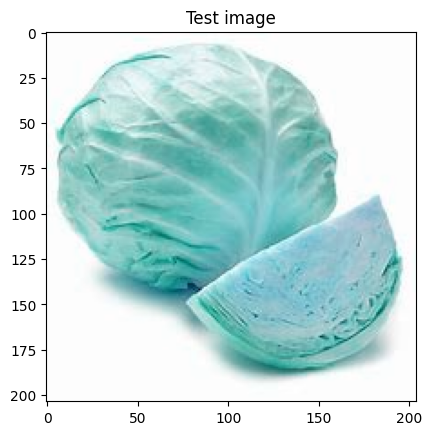

In [23]:
import matplotlib.pyplot as plt
img = cv2.imread(img_path)
plt.imshow(img)
plt.title("Test image")
plt.show()

In [24]:
prediction = model.predict(img_array)
# print(prediction[0])
predicted_class = 'Carrot' if prediction[0] < 0.5 else 'Cabbage'  
predicted_class

1/1 [==============================] - 0s 22ms/step


'Cabbage'